# 非階層的クラスタ分析

Iris を対象として非階層的クラスタ分析

- 非階層的クラスタ分析ではクラスタ数を決めてデータをグループに分割
- 適切なクラスタ数の推定

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# K-means
from sklearn.cluster import KMeans

iris = sns.load_dataset('iris')

# クラスタリング対象のデータから species 列を削除
# - 散布図で見やすいように、分類への影響が小さい sepal_length, sepal_width 列も削除
X = iris.drop(['sepal_length', 'sepal_width', 'species'], axis=1)

Iris の species は3種類であることがわかっているため、クラスタ数 3 でクラスタリングし、クラスタリング結果を散布図で描画。

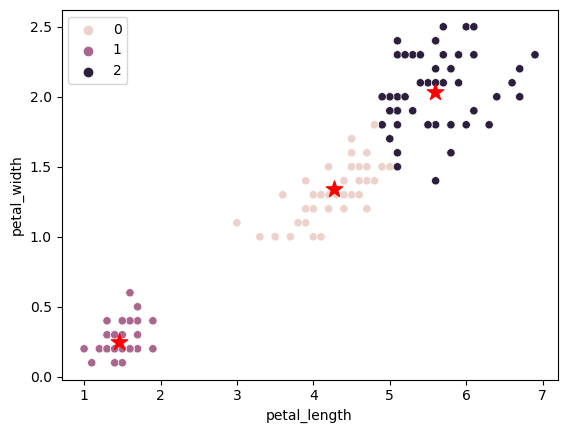

In [3]:
model = KMeans(n_clusters=3)
model.fit(X)
# クラスタリング結果を散布図で描画
sns.scatterplot(x=X.petal_length, y=X.petal_width, hue=model.labels_)
# 重心をプロット
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
            marker='*', color='red', s=150)

In [5]:
def kmeans_plot(n):
    print('n_clusters:', n)
    model = KMeans(n_clusters=n)
    model.fit(X)
    # クラスタリング結果を散布図を描画
    sns.scatterplot(x=X.petal_length, y=X.petal_width, hue=model.labels_)
    # 重心をプロット
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
                marker='*', color='red', s=150)
    plt.show()

クラスタ数が不明であるとすると、複数のクラスタ数で試行することになる。<br>
そこで、クラスタ数を 2~4 に変化させて、クラスタリング結果を散布図を描画。

n_clusters: 2


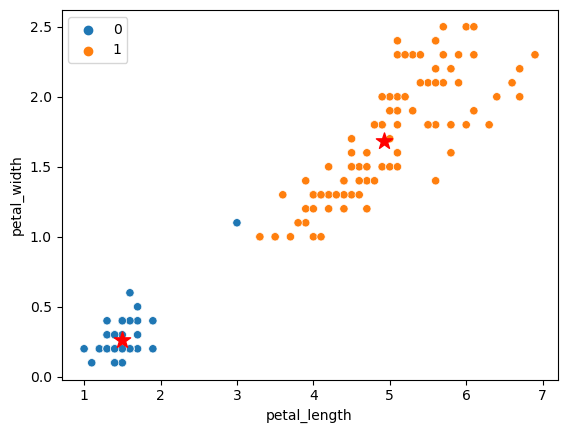

n_clusters: 3


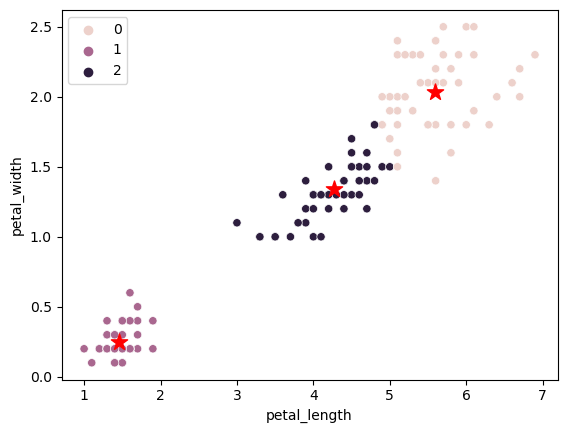

n_clusters: 4


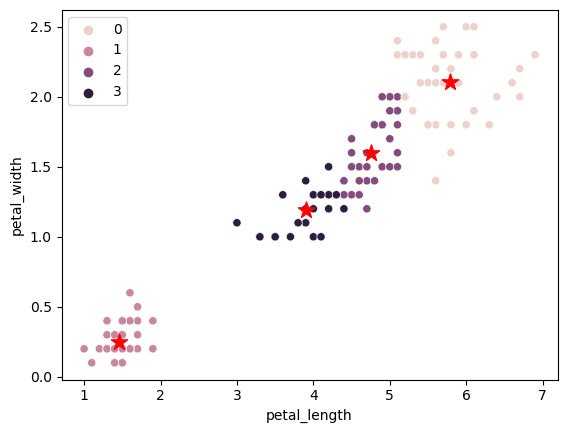

In [6]:
for n in range(2, 5):
    kmeans_plot(n)

クラスタリングの結果：

- クラスタ数が 2,3 はどちらであっても良さそうに見える。
- クラスタ数が 3 で良ければ、4 も十分にあり得そうに見える。

どのクラスタ数が適切か、指標が必要。

<hr>

## クラスタ数の推定方法

- エルボー法
- シルエット分析

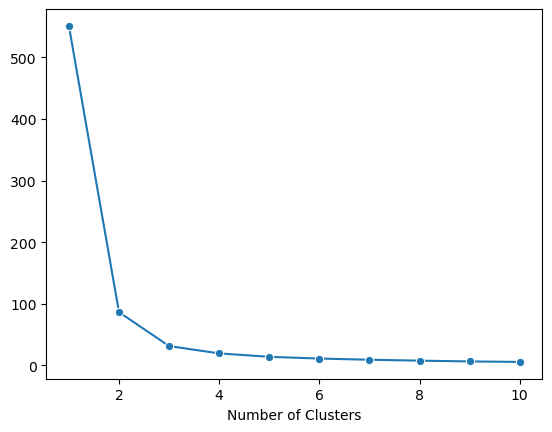

In [7]:
# エルボー法
# https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch11/ch11.py
import matplotlib.pyplot as plt
distortions = []
for n in range(1, 11):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)

sns.lineplot(x=range(1, 11), y=distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.show()

見るところ
- 最も折れ曲がりがあるところ

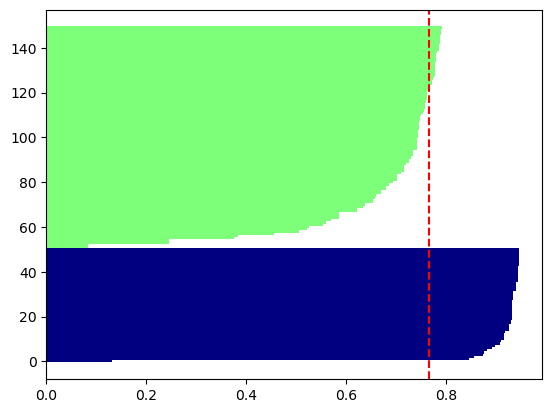

2 Clusters: Average silhouette coefficient: 0.765


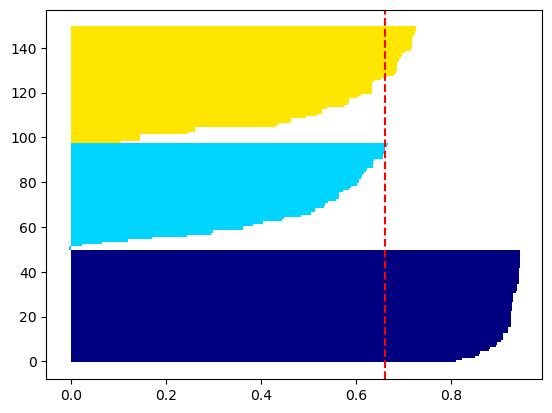

3 Clusters: Average silhouette coefficient: 0.660


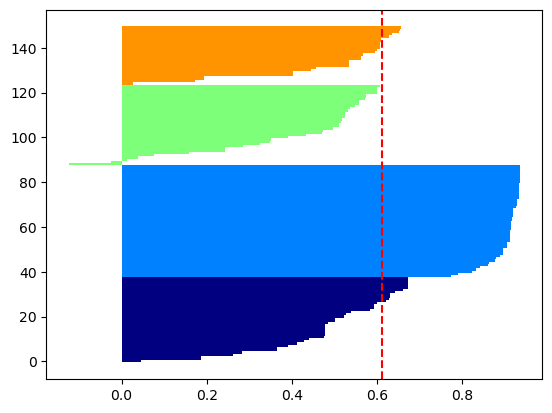

4 Clusters: Average silhouette coefficient: 0.613


In [8]:
# シルエット分析
# https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch11/ch11.py
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def silhouette(n):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(X)
    cluster_labels = set(model.labels_)
    n_clusters = len(cluster_labels)
    silhouette_vals = silhouette_samples(X, model.labels_, metric='euclidean')
    y_lower, y_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[model.labels_ == c]
        c_silhouette_vals.sort()
        y_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0,
                 edgecolor='none', color=color)
        yticks.append((y_lower + y_upper) / 2.)
        y_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.show()
    print('{} Clusters: Average silhouette coefficient: {:.3f}'.format(n, silhouette_avg))

for n in range(2, 5):
    silhouette(n)

見るところ：
- シルエット係数
- 長さと幅が揃い方